# test the quality & perfomance of different resize kernel and package
mainly on opencv & pillow

### reference
* pillow
    * [resample filter](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters)
    * ["ANTIALIAS"](https://pillow.readthedocs.io/en/stable/releasenotes/2.7.0.html#antialias-renamed-to-lanczos)
* opencv
    * [resample filter](https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html)

In [49]:
from pathlib import Path
from random import sample, choice

import cv2
import numpy as np
import skimage.io as io
from PIL import Image
from IPython.display import display

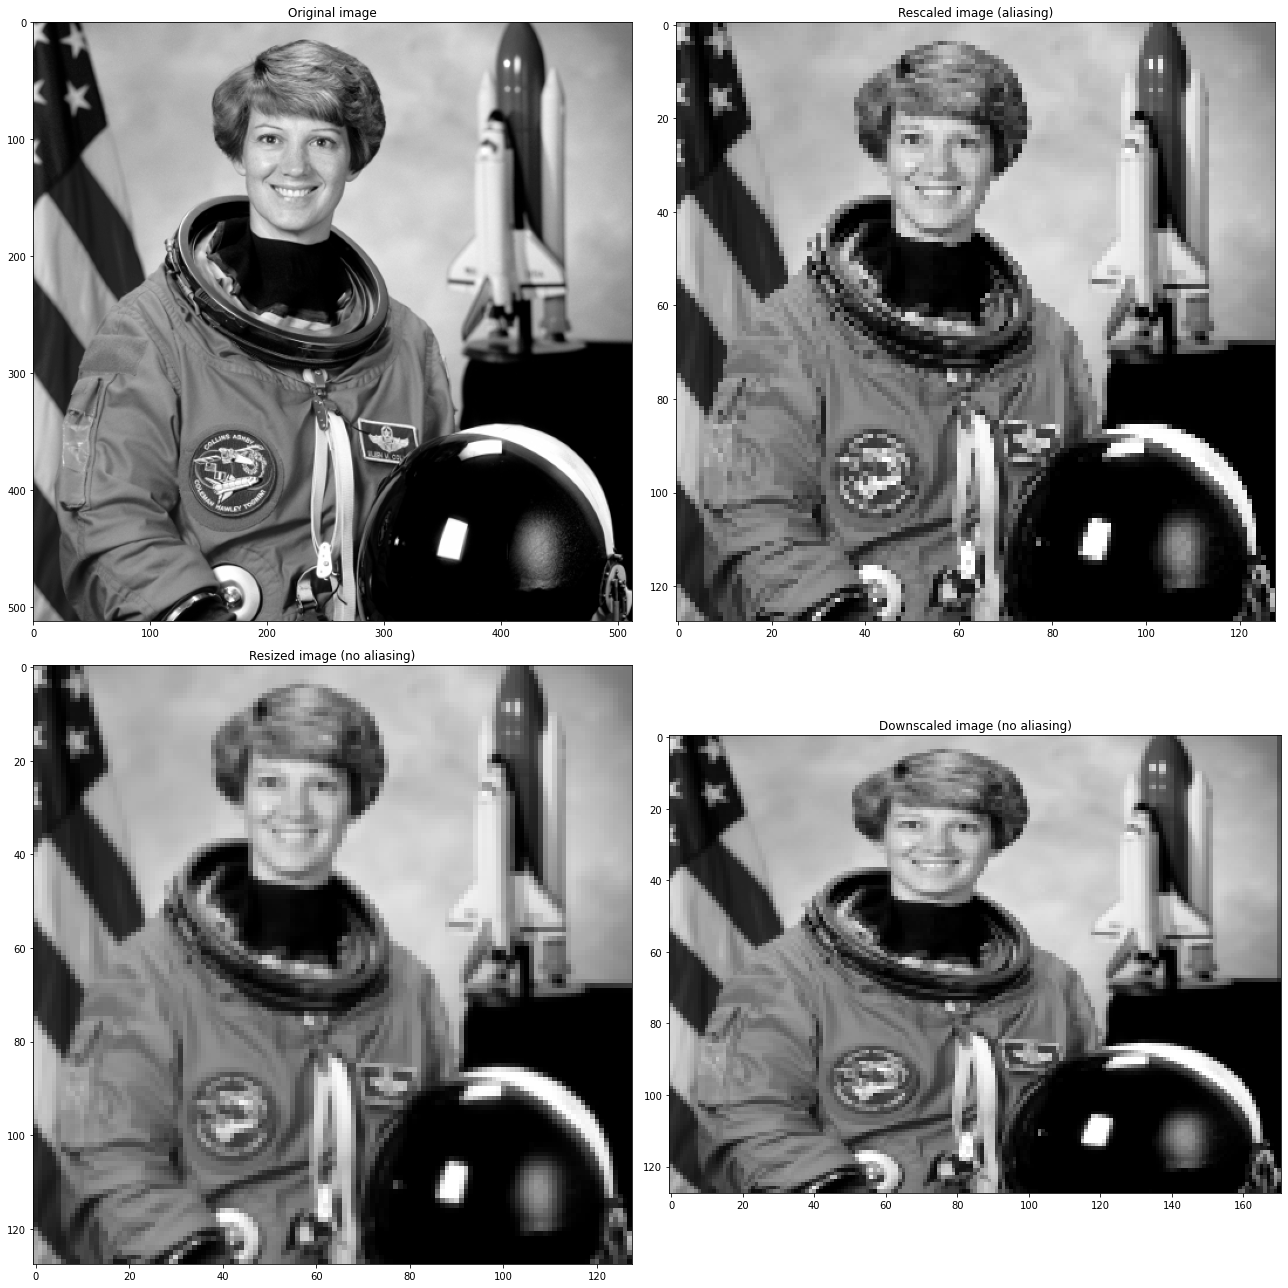

In [4]:
# scikit-image resizing
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

(1101, 750, 3)


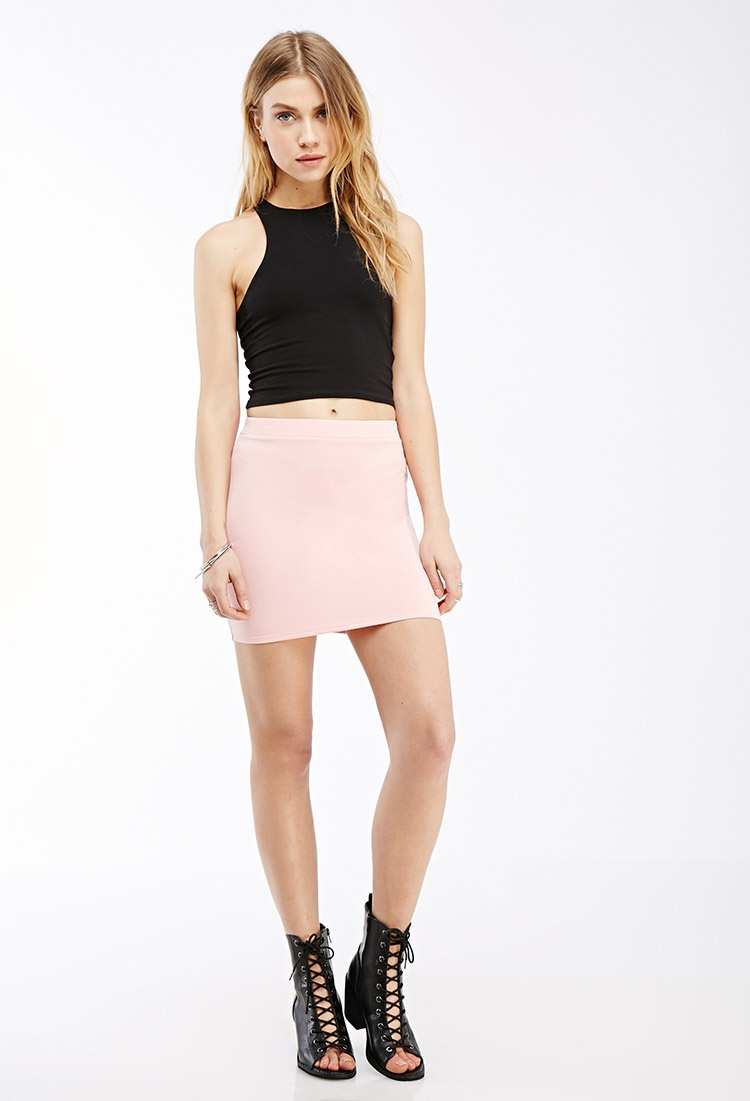

In [34]:
original = io.imread('flatten_raw_images1024/id_00007788_06_4_full.jpg')
print(original.shape)
original_pillow = Image.fromarray(original)
display(original_pillow)

## 1101 x 750 -> 256 x 174

In [41]:
out = {}
1101 / 750, 256 / 174

(1.468, 1.471264367816092)

In [27]:
%%timeit -n 1000 -r 100
out['nearest'] = cv2.resize(original, (174, 256), interpolation=cv2.INTER_NEAREST)

59.4 µs ± 814 ns per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [29]:
%%timeit -n 1000 -r 100
out['bilinear'] = cv2.resize(original, (174, 256), interpolation=cv2.INTER_LINEAR)

147 µs ± 1.16 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [31]:
%%timeit -n 1000 -r 100
out['area'] = cv2.resize(original, (174, 256), interpolation=cv2.INTER_AREA)

3.35 ms ± 15.8 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [32]:
%%timeit -n 1000 -r 100
out['bicubic'] = cv2.resize(original, (174, 256), interpolation=cv2.INTER_CUBIC)

1.17 ms ± 106 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [33]:
%%timeit -n 1000 -r 100
out['lanczos'] = cv2.resize(original, (174, 256), interpolation=cv2.INTER_LANCZOS4)

2.88 ms ± 204 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [36]:
%%timeit -n 1000 -r 100
out['pillow_bicubic'] = original_pillow.resize((174, 256), Image.BICUBIC)

1.19 ms ± 4.8 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [37]:
%%timeit -n 1000 -r 100
out['pillow_lanczos'] = original_pillow.resize((174, 256), Image.LANCZOS)

1.81 ms ± 7.97 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


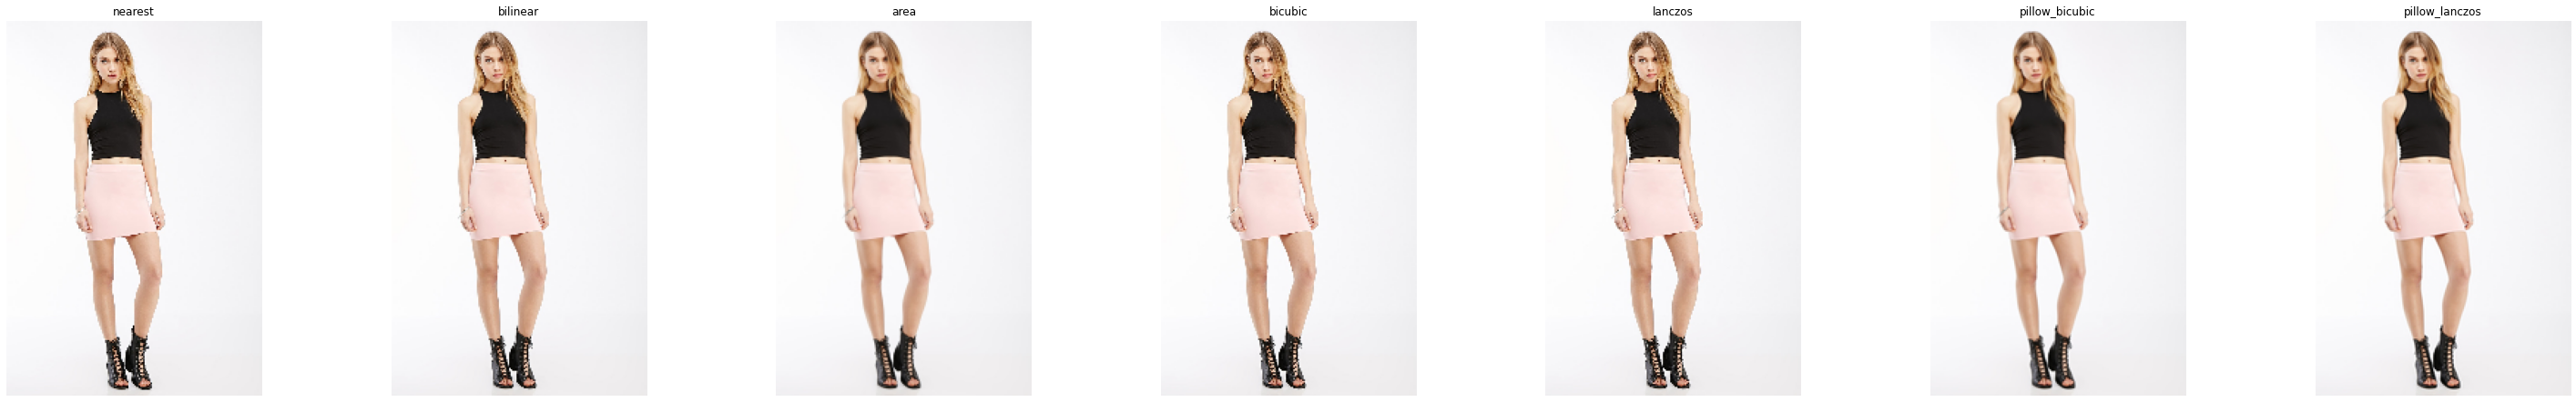

In [65]:
fig, ax = plt.subplots(1, len(out), figsize=(len(out) * 6, 6))
for i, (key, out_img) in enumerate(out.items()):
    if key.startswith('pillow'):
        out_img = np.asarray(out_img)
    ax[i].set_title(key)
    ax[i].imshow(out_img)
    ax[i].axis('off')

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.8)
plt.show()

In [82]:
fig.savefig('dwn1101x750to256x256.png')

## 1024 x 1024 -> 256 x 256
* 1101 x 750 -> padding( (1101 - 1) x (175 + 750 + 175) ) -> 1024 x 1024

In [76]:
original_1100 = cv2.copyMakeBorder(original[:1100], 0, 0, 175, 175, cv2.BORDER_CONSTANT, value=(255, 255, 255))
original_1024 = cv2.resize(original_1100, (1024, 1024), interpolation=cv2.INTER_LANCZOS4)
original_1024_pillow = Image.fromarray(original_1024)

In [70]:
%%timeit -n 1000 -r 100
out256['nearest'] = cv2.resize(original_1024, (256, 256), interpolation=cv2.INTER_NEAREST)

86.6 µs ± 768 ns per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [71]:
%%timeit -n 1000 -r 100
out256['bilinear'] = cv2.resize(original_1024, (256, 256), interpolation=cv2.INTER_LINEAR)

202 µs ± 1.97 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [72]:
%%timeit -n 1000 -r 100
out256['area'] = cv2.resize(original_1024, (256, 256), interpolation=cv2.INTER_AREA)

1.56 ms ± 106 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [73]:
%%timeit -n 1000 -r 100
out256['bicubic'] = cv2.resize(original_1024, (256, 256), interpolation=cv2.INTER_CUBIC)

1.72 ms ± 137 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [74]:
%%timeit -n 1000 -r 100
out256['lanczos'] = cv2.resize(original_1024, (256, 256), interpolation=cv2.INTER_LANCZOS4)

4.13 ms ± 345 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [77]:
%%timeit -n 1000 -r 100
out256['pillow_bicubic'] = original_1024_pillow.resize((256, 256), Image.BICUBIC)

1.52 ms ± 134 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [78]:
%%timeit -n 1000 -r 100
out256['pillow_lanczos'] = original_1024_pillow.resize((256, 256), Image.LANCZOS)

2.47 ms ± 213 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [79]:
out256['pillow_bicubic'] = original_1024_pillow.resize((256, 256), Image.BICUBIC)
out256['pillow_lanczos'] = original_1024_pillow.resize((256, 256), Image.LANCZOS)

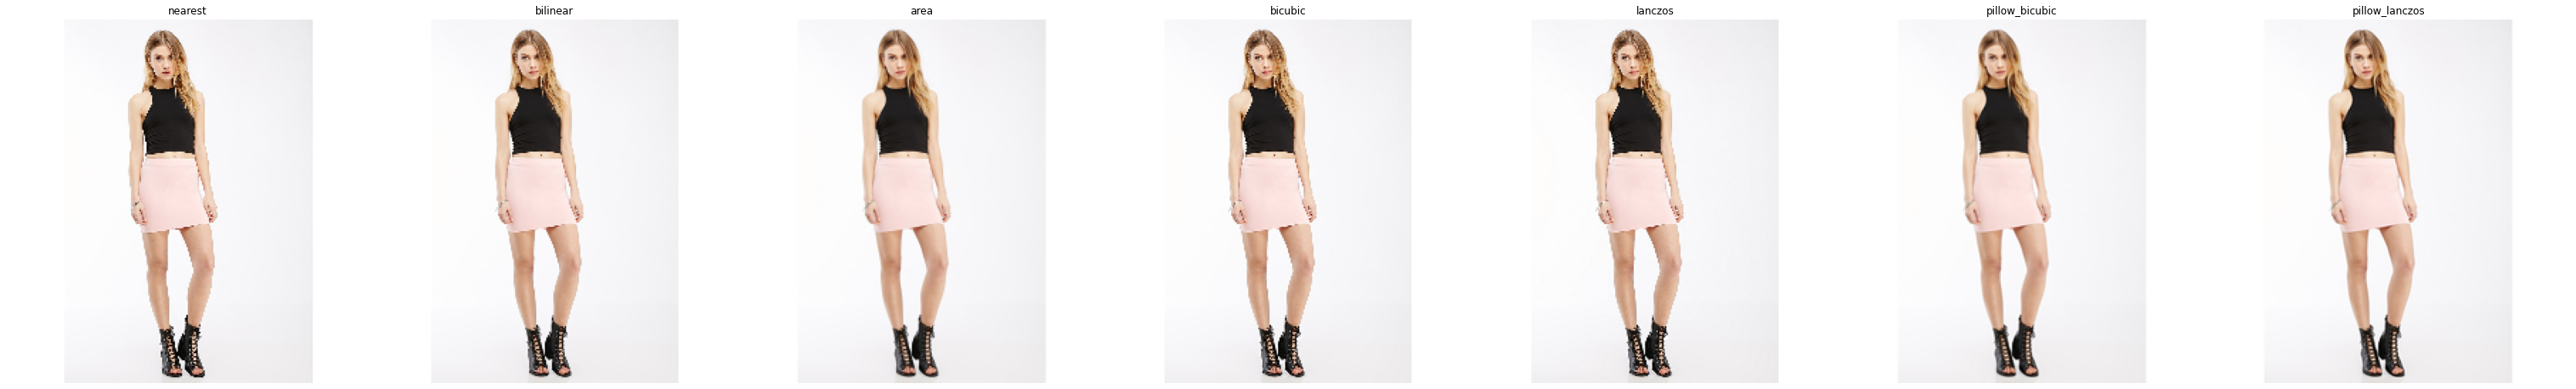

In [84]:
fig, ax = plt.subplots(1, len(out256), figsize=(len(out256) * 6, 6))
for i, (key, out_img) in enumerate(out256.items()):
    if key.startswith('pillow'):
        out_img = np.asarray(out_img)
    ax[i].set_title(key)
    ax[i].imshow(out_img)
    ax[i].axis('off')

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.8)
plt.show()
fig.savefig('dwn1024x1024to256x256.png')

## 256 x 256 -> 1024 x 1024
* using `np.asarray(out256['pillow_lanczos'])` as 256 x 256 representative.

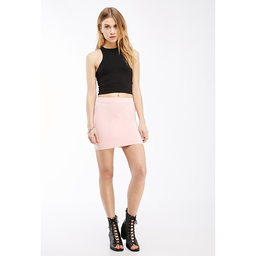

In [94]:
original_256_pillow = out256['pillow_lanczos']
original_256 = np.asarray(original_256_pillow)
# out1024 = {}
original_256_pillow

In [88]:
%%timeit -n 1000 -r 100
out1024['nearest'] = cv2.resize(original_256, (1024, 1024), interpolation=cv2.INTER_NEAREST)

The slowest run took 4.35 times longer than the fastest. This could mean that an intermediate result is being cached.
648 µs ± 281 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [89]:
%%timeit -n 1000 -r 100
out1024['bilinear'] = cv2.resize(original_256, (1024, 1024), interpolation=cv2.INTER_LINEAR)

The slowest run took 4.98 times longer than the fastest. This could mean that an intermediate result is being cached.
604 µs ± 362 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [90]:
%%timeit -n 1000 -r 100
out1024['area'] = cv2.resize(original_256, (1024, 1024), interpolation=cv2.INTER_AREA)

409 µs ± 9.52 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [91]:
%%timeit -n 1000 -r 100
out1024['bicubic'] = cv2.resize(original_256, (1024, 1024), interpolation=cv2.INTER_CUBIC)

1.59 ms ± 516 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [92]:
%%timeit -n 1000 -r 100
out1024['lanczos'] = cv2.resize(original_256, (1024, 1024), interpolation=cv2.INTER_LANCZOS4)

7.12 ms ± 1.95 ms per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [95]:
%%timeit -n 1000 -r 100
out1024['pillow_bicubic'] = original_256_pillow.resize((1024, 1024), Image.BICUBIC)

2.55 ms ± 200 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [96]:
%%timeit -n 1000 -r 100
out1024['pillow_lanczos'] = original_256_pillow.resize((1024, 1024), Image.LANCZOS)

3.14 ms ± 181 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [97]:
out1024['pillow_bicubic'] = original_256_pillow.resize((1024, 1024), Image.BICUBIC)
out1024['pillow_lanczos'] = original_256_pillow.resize((1024, 1024), Image.LANCZOS)

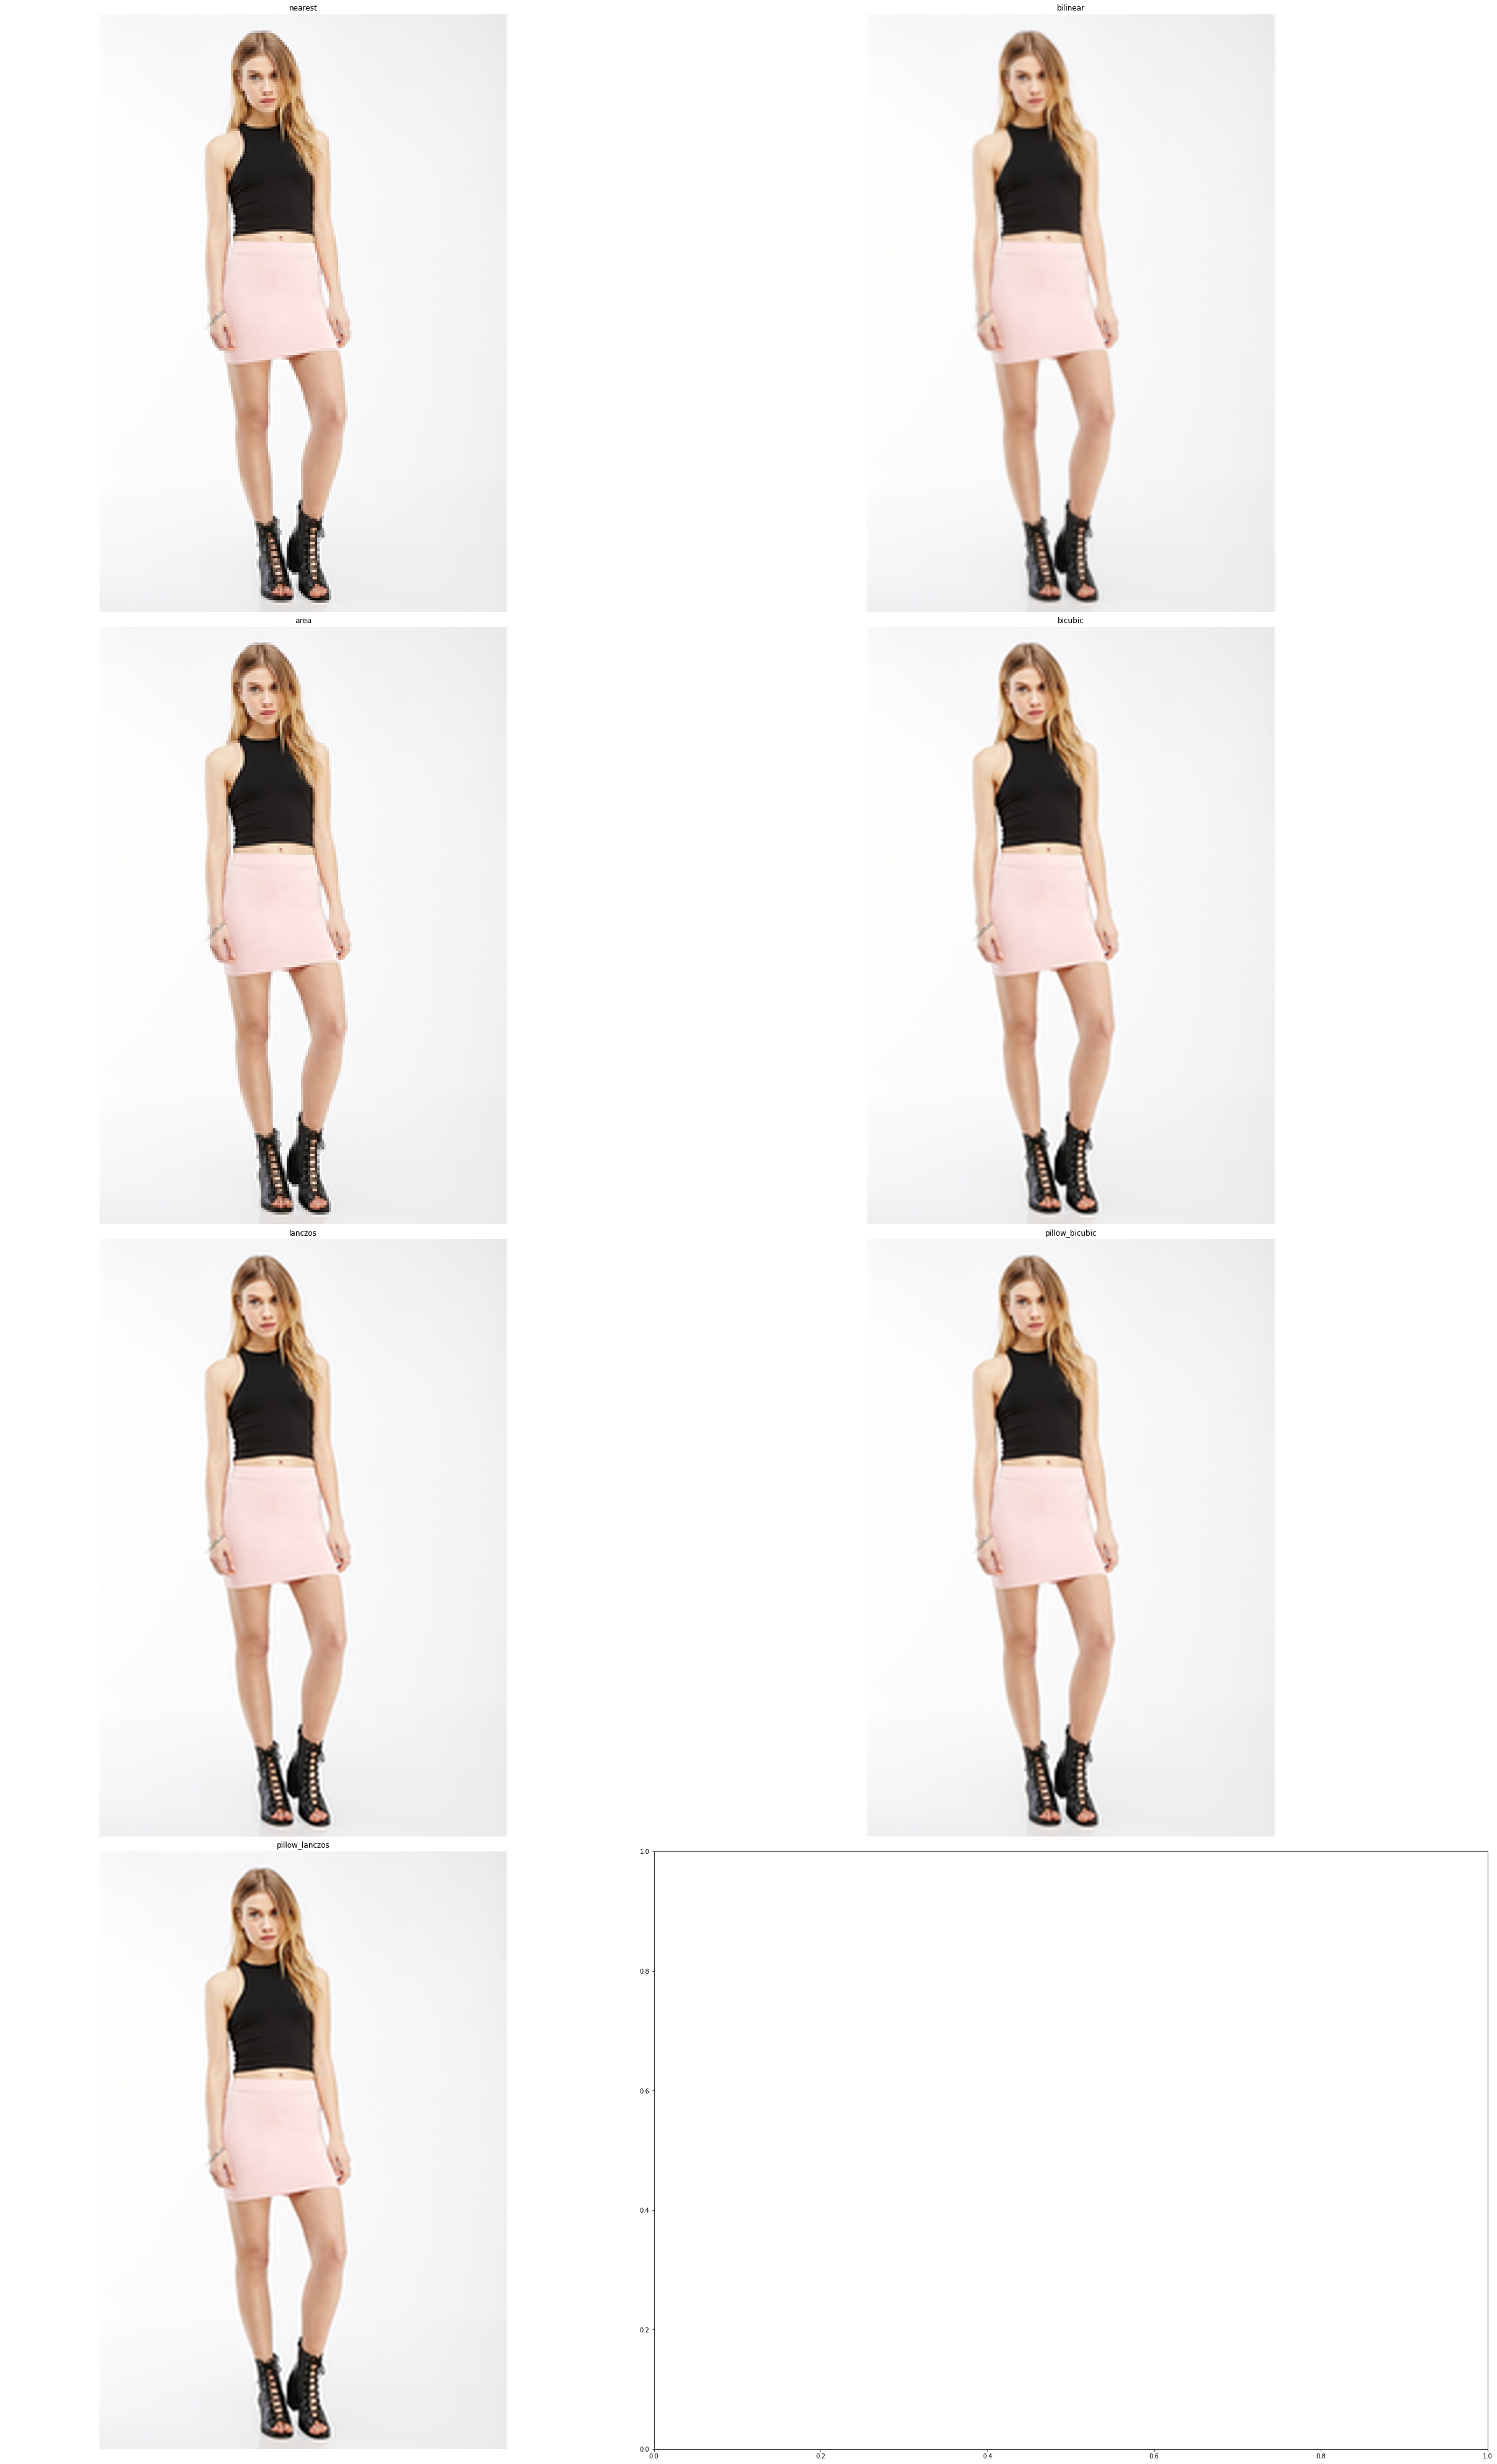

In [104]:
fig, ax = plt.subplots(len(out1024) // 2 + int(len(out1024) % 2), 2, figsize=(36, 18 * (len(out1024) // 2) + int(len(out1024) % 2)))
for i, (key, out_img) in enumerate(out1024.items()):
    if key.startswith('pillow'):
        out_img = np.asarray(out_img)
    ax[i // 2][i % 2].set_title(key)
    ax[i // 2][i % 2].imshow(out_img)
    ax[i // 2][i % 2].axis('off')

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.8)
plt.show()
fig.savefig('dwn256x256to1024x1024.png')

In [ ]:
fig.savefig()